YOLO Algorithm with openCV to detect objects.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

In [4]:
image = cv2.imread("./fire_hydrant.jpg")
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

In [5]:
classes = None

#obtained the files from https://pjreddie.com/darknet/yolo/

with open("./coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [6]:
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

In [12]:
net = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

In [13]:
net.setInput(blob)

In [14]:
outs = net.forward(get_output_layers(net))
outNames = net.getUnconnectedOutLayersNames()

In [15]:
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

In [16]:
boxes = []
confidences = []
class_ids = []

for output in outs:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = round(detection[0] * Width)
      center_y = round(detection[1] * Height)
      w = round(detection[2] * Width)
      h = round(detection[3] * Height)


      x = round(center_x - w/2)
      y = round(center_y - h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


In [17]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [18]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label =str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = COLORS[i]
  print(label,confi)
  print(x,y,w,h)
  cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),5)
  cv2.putText(image,label+ " "+confi,(x-10,y),cv2.FONT_ITALIC,1,(255,255,255),3)

fire hydrant 0.94
752 14 201 337


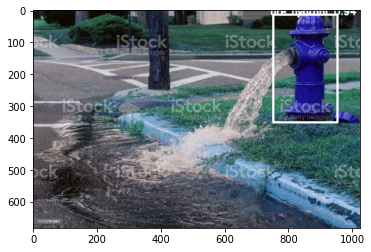

In [19]:
plt.imshow(image)